# Insightface

- Website: https://insightface.ai/
- Github: https://github.com/deepinsight/insightface
- Github Python package and Models: https://github.com/deepinsight/insightface/tree/master/python-package

In [1]:
import numpy as np
import cv2 # opencv
from PIL import Image

In [2]:
import insightface

### 1. Configure Insight Face Model

| Name          | Detection Model | Recognition Model    | Alignment    | Attributes | Model-Size | Link                                                         | Auto |
| ------------- | --------------- | -------------------- | ------------ | ---------- | ---------- | ------------------------------------------------------------ | ------------- |
| antelopev2    | SCRFD-10GF      | ResNet100@Glint360K  | 2d106 & 3d68 | Gender&Age | 407MB      | [link](https://drive.google.com/file/d/18wEUfMNohBJ4K3Ly5wpTejPfDzp-8fI8/view?usp=sharing) | N             |
| **buffalo_l** | SCRFD-10GF      | ResNet50@WebFace600K | 2d106 & 3d68 | Gender&Age | 326MB      | [link](https://drive.google.com/file/d/1qXsQJ8ZT42_xSmWIYy85IcidpiZudOCB/view?usp=sharing) | Y             |
| buffalo_m     | SCRFD-2.5GF     | ResNet50@WebFace600K | 2d106 & 3d68 | Gender&Age | 313MB      | [link](https://drive.google.com/file/d/1net68yNxF33NNV6WP7k56FS6V53tq-64/view?usp=sharing) | N             |
| buffalo_s     | SCRFD-500MF     | MBF@WebFace600K      | 2d106 & 3d68 | Gender&Age | 159MB      | [link](https://drive.google.com/file/d/1pKIusApEfoHKDjeBTXYB3yOQ0EtTonNE/view?usp=sharing) | N             |
| buffalo_sc    | SCRFD-500MF     | MBF@WebFace600K      | -            | -          | 16MB       | [link](https://drive.google.com/file/d/19I-MZdctYKmVf3nu5Da3HS6KH5LBfdzG/view?usp=sharing) | N             |



Recognition Accuracy:

| Name      | MR-ALL | African | Caucasian | South Asian | East Asian | LFW   | CFP-FP | AgeDB-30 | IJB-C(E4) |
| :-------- | ------ | ------- | --------- | ----------- | ---------- | ----- | ------ | -------- | --------- |
| buffalo_l | 91.25  | 90.29   | 94.70     | 93.16       | 74.96      | 99.83 | 99.33  | 98.23    | 97.25     |
| buffalo_s | 71.87  | 69.45   | 80.45     | 73.39       | 51.03      | 99.70 | 98.00  | 96.58    | 95.02     |



In [3]:
from insightface.app import FaceAnalysis

In [4]:
# buffalo_l model
app_l = FaceAnalysis(name='buffalo_l',
                     root='insightface_model',
                     providers=['CPUExecutionProvider'])
# ['CUDAExecutionProvider', 'CPUExecutionProvider']

app_l.prepare(ctx_id=0, det_size=(640,640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [5]:
# load buffalo sc model
app_sc = FaceAnalysis(name='buffalo_sc',
                      root='insightface_model')
# providers=['CPUExecutionProvider']
app_sc.prepare(ctx_id=0, det_size=(640,640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


/Users/anirbansen/Downloads/app/attendance_system/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


### 2. Load Image 

In [6]:
img = cv2.imread('test_image_1.jpg')

cv2.imshow('image',img)
cv2.waitKey(0) # as soon as if i press esc key or x button, then my window will get close
cv2.destroyAllWindows()

### 3. Apply image to insightface model and get results

In [7]:
results_l = app_l.get(img)  # get results from buffalo large model
type(results_l), len(results_l) 

/Users/anirbansen/Downloads/app/attendance_system/lib/python3.11/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


(list, 113)

In [8]:
# draw the bounding box of each detected face
img_copy = img.copy()
gender_encode = ['Female','Male']
for res in results_l:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    
    # draw rectangle
    cv2.rectangle(img_copy,(x1,y1),(x2,y2),(0,255,0),2)
    
    # key points
    kps = res['kps'].astype(int)
    for k1, k2 in kps:
        cv2.circle(img_copy,(k1,k2),2,(0,255,255),-1)
        
    # detection score
    score = "score: {}%".format(int(res['det_score']*100))
    cv2.putText(img_copy,score,(x1, y1),cv2.FONT_HERSHEY_DUPLEX,0.5,(255,0,255))
    
    # age and gender
    gender = gender_encode[res['gender']]
    age = res['age']
    age_gender = f"{gender}::{age}"
    
    cv2.putText(img_copy,age_gender,(x1, y2+10),cv2.FONT_HERSHEY_DUPLEX,0.5,(255,0,255))
    
cv2.imshow('bbox',img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

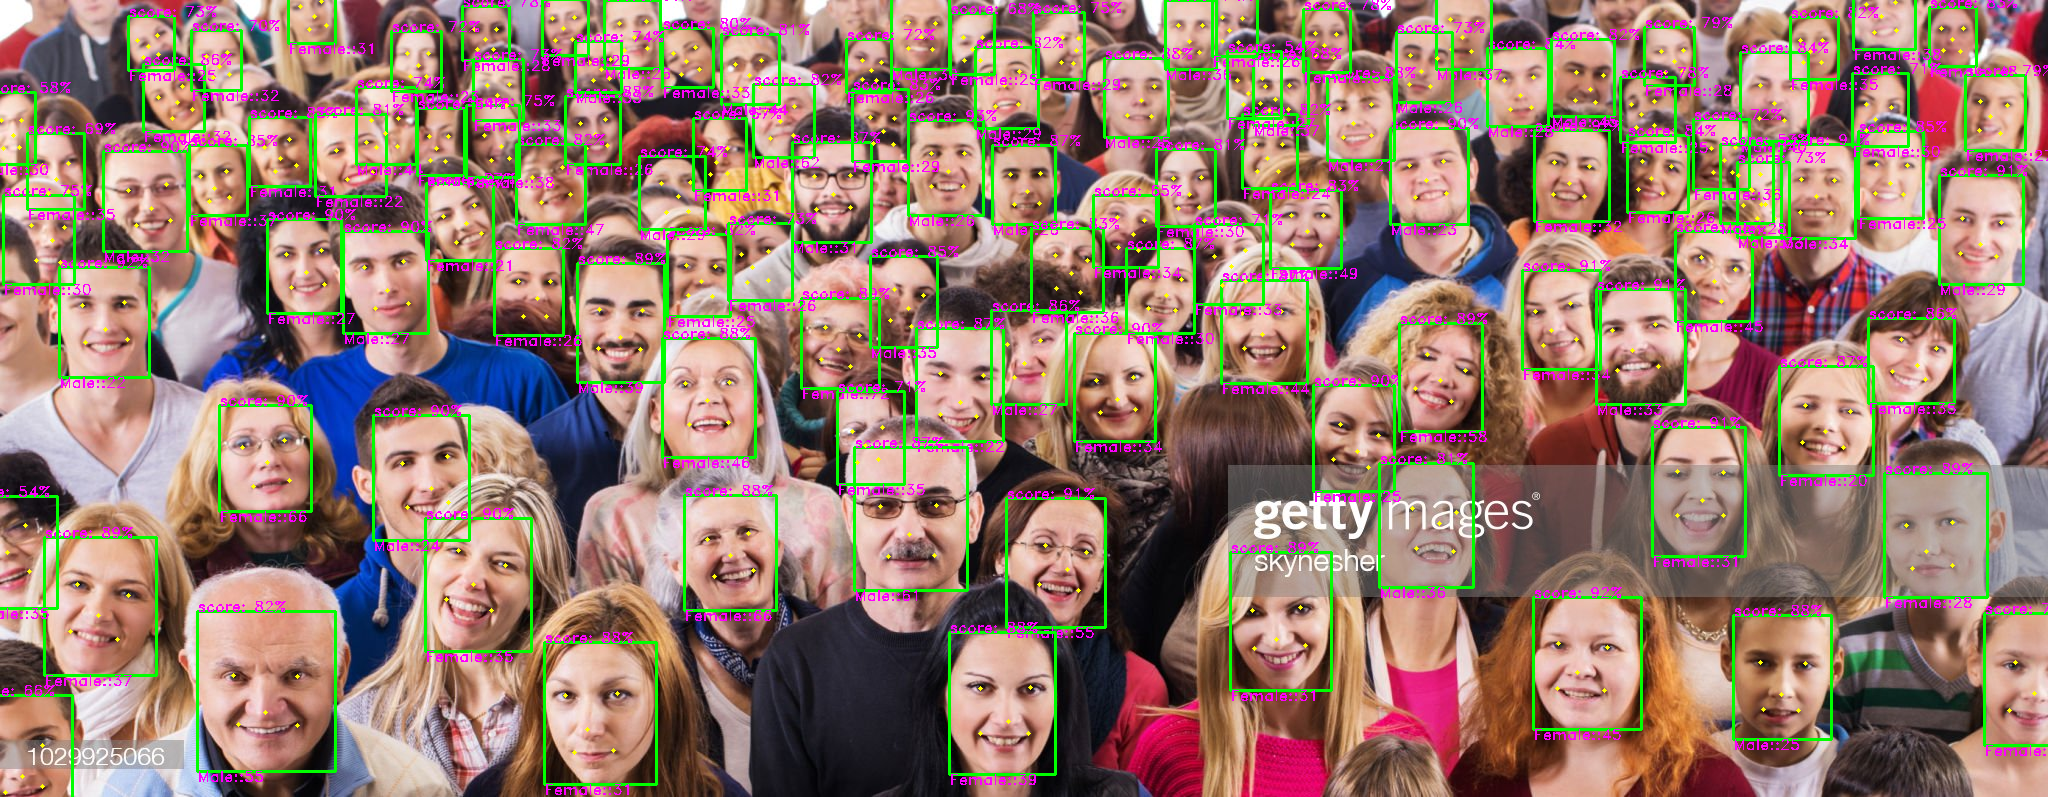

In [9]:
Image.fromarray(img_copy[:,:,(2,1,0)])

### Buffalo - S model

In [10]:
# load buffalo sc model
app_sc = FaceAnalysis(name='buffalo_sc',
                      root='insightface_model',
                      providers=['CPUExecutionProvider'])
app_sc.prepare(ctx_id=0, det_size=(640,640),det_thresh=0.3)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [11]:
results_sc = app_sc.get(img)

In [12]:
len(results_sc)

114

In [13]:
img_copy = img.copy()
for res in results_sc:
    # bounding box
    x1, y1, x2, y2 = res['bbox'].astype(int)
    cv2.rectangle(img_copy,(x1,y1),(x2,y2),(0,255,0),2)
    
    # kps
    kps = res['kps'].astype(int)
    for kp in kps:
        cv2.circle(img_copy,kp,3,(0,255,255),-1)
        
    # detection score
    score = "score: {}%".format(int(res['det_score']*100))
    cv2.putText(img_copy,score,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.7,(255,255,255),1)
    
cv2.imshow('image',img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

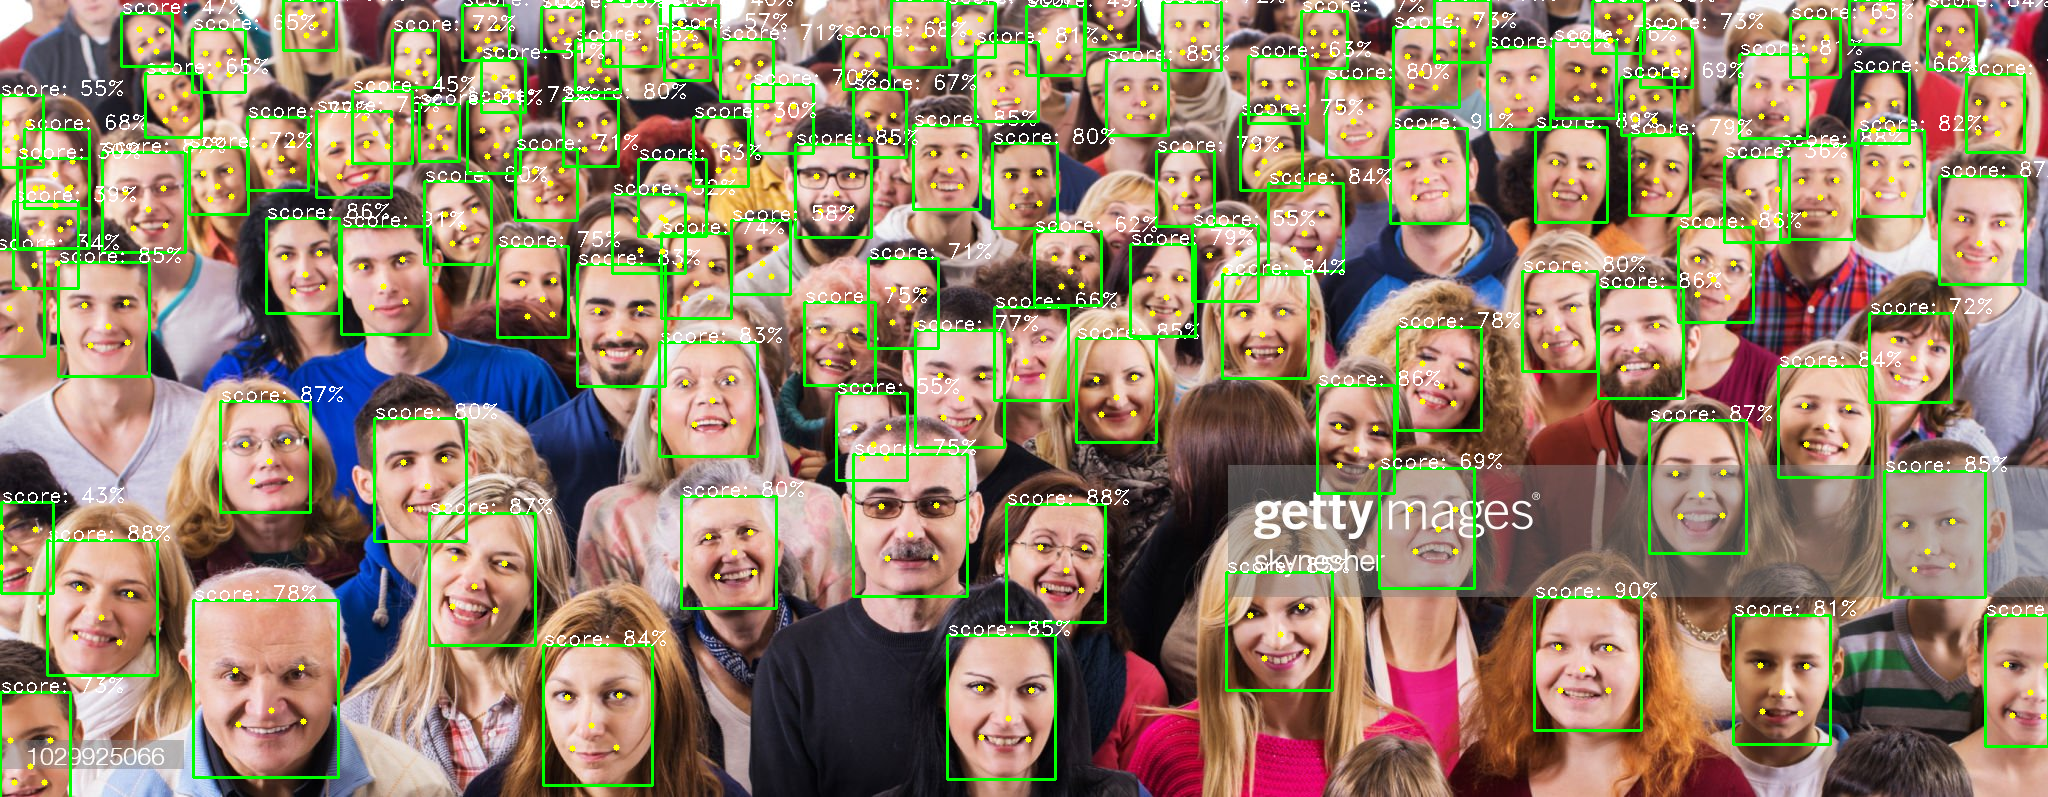

In [ ]:
Image.fromarray(img_copy[:,:,(2,1,0)])

### [END](https://www.udemy.com/user/freeai-space/)
---